# YZV211 - HW2 - Visualization


In this assignment, you will be analyzing the dataset collected from your answers in survey. **Read each question thoroughly, write the code for visualization and make an explanation if question asks for. Do not forget to read the assignment document!**


## Reading and Cleaning


In this part, you read the data to a DataFrame and clean the data if below formats are not met. You may clean the data on excel manually or by writing code except for one column:

**Formatting should be corrected for "Neighborhood" column in Q0 part by one-liner code/s.**

Do the cleaning part with a way that you can clean the data in least amount of time possible. More focus will be on the visualization part.


- Age - numeric (integer)
- GPA - numeric (float)
- Expected_GPA - numeric (float)
- Expected_Grade - object (string)
- Neighborhood - object (string)
- Latitude - numeric (float)
- Longitude - numeric (float)
- Travel_Time - numeric (integer)
- Time_For_Study - numeric (integer)
- Time_For_Hobbies - numeric (integer)
- Time_For_Sports - numeric (integer)
- Time_For_Socializing - numeric (integer)
- Time_For_Entertainment - numeric (integer)


### Cleaning Instructions:


- "Expected_Grade": Make sure that value is two _uppercase_ letter (If there is an interval, you can set the value as the lowest grade in that interval). Ensure that written letter grade is a valid grade.
- Neighborhood: Make sure that value is only a word such as Maslak, Ayazaga. Only first letter should be uppercase. Be sure that same words have same letters to avoid redundancy! You may detect the invalid one by looking to data and fix the format by code.
- Travel_Time: Make sure that value is in minutes format (If there is an interval, you can set the value as the lowest minute in that interval).

Make sure that value is in hrs format for below columns (If there is an interval, you can set the value as the lowest time in that interval):

- Time_For_Study
- Time_For_Hobbies
- Time_For_Sports
- Time_For_Socializing
- Time_For_Entertainment


Check for invalid entries, nulls. If a numeric value is null or invalid, you can fill that value with the **mean** of the column. If a string value is empty or invalid, fill with mostly occurred value (**mode**). **If there is not an instruction for specific case, you can clean the data with your own way**.


## Data Visualization


### Load libraries


In [487]:
%pip install basemap


Note: you may need to restart the kernel to use updated packages.


In [501]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [488]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import pandas as pd
import numpy as np


### Load the data


In [489]:
df = pd.read_excel("YZV211E - Survey (1).xlsx", engine="openpyxl")


In [490]:
lst = ['GPA','Expected_GPA','Repeat_Course_Num','Time_For_Study','Time_For_Hobbies','Time_For_Sports','Time_For_Socializing','Time_For_Entertainment','Latitude','Longitude']
for i in lst:
    mean_value = df[i].mean()
    df[i].fillna(value=mean_value, inplace=True) # fill null values with mean

In [491]:
lst = ['Expected_Letter_Grade','Neighborhood']
for i in lst:
    df[i].fillna(df[i].mode()[0], inplace=True) # fill null values with mode

In [492]:
lst = ["Travel_Time",
       "Time_For_Study",
       "Time_For_Hobbies",
       "Time_For_Sports",
       "Time_For_Socializing",
       "Time_For_Entertainment"]
for i in lst:
    df = df.astype({i: 'int32'}) # change types of columns
df.dtypes

Age                         int64
GPA                       float64
Repeat_Course_Num           int64
Expected_GPA              float64
Expected_Letter_Grade      object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Travel_Time                 int32
Time_For_Study              int32
Time_For_Hobbies            int32
Time_For_Sports             int32
Time_For_Socializing        int32
Time_For_Entertainment      int32
dtype: object

### Q0

**Fix the format** of the _Neighborhood"_ as described in cleaning instructions. **If there will be other automatic cleaning include in below as a new cell.** Below, you will see one more question, **explain your both manual and automatic (if there is any) in that cell _briefly_.**


In [493]:
def formatter(neigh_str): # replace turkish character with english ones
    for index, i in enumerate(neigh_str):
        if (i == "ı" or i == "I"):
            neigh_str = neigh_str.replace(i, "i")
        elif (i == "ğ" or i == "Ğ"):
            neigh_str = neigh_str.replace(i, "g")

        elif (i == "ü" or i == "Ü"):
            neigh_str = neigh_str.replace(i, "u")

        elif (i == "ş" or i == "Ş"):
            neigh_str = neigh_str.replace(i, "s")

        elif (i == "ö" or i == "Ö"):
            neigh_str = neigh_str.replace(i, "o")

        elif (i == "ç" or i == "Ç"):
            neigh_str = neigh_str.replace(i, "c")

    return neigh_str

df["Neighborhood"] = df["Neighborhood"].str.strip() # delete spaces
df['Neighborhood'] = df['Neighborhood'].apply(formatter) # apply function to df
df["Neighborhood"] = df["Neighborhood"].str.capitalize() # capitalize strings


### Below, write how have you handled the invalid data in whole dataset with examples to show your cleaning procedure


In the survey, travel time was required in minutes but some of the participants was entered in hours, I converted them to minutes.If there is an interval, I set the value as the lowest minute in that interval(ex:6-10 hours -> 6.If strings were entered when numeric value was requested, I deleted those strings(ex: I'dont know -> null). I filled the blank data expected numeric value with the mean of the column.I filled the blank data expected string value with the mode of the column.I deleted the spaces at the beginning and the end of the words.(ex:" Ayazağa" -> "Ayazağa").I deleted the Turkish characters in the words and made the first letters capitalized and the other letters lowercase(ex:"AYAZAĞA" -> "Ayazaga").

### Q1


#### Part 1

Show the frequency distribution of the GPAs by a plot. **Do not show** outlier/s (**extremely low values**) for better visualization. **Show values only between 1-4 for this plot**. Explain what you have understand from the graph in few sentences.


**Your Answer:**


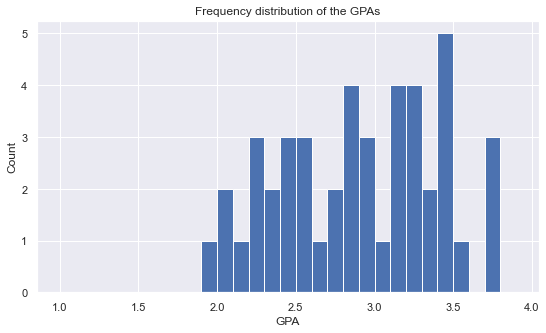

In [513]:
plt.figure(figsize=(9, 5))
plt.title("Frequency distribution of the GPAs")
plt.xlabel("GPA")
plt.ylabel("Count")
plt.hist(df['GPA'], bins=np.arange(1, 4, 0.1)) # create histogram with GPAs
plt.show()

We can say that the GPAs of the people are between 2 and 3.5, and we can also say that the GPAs are almost equally distributed between 2 and 3.

#### Part 2

Show the frequency distribution of the GPAs and expected GPAs on a single plot. **Do not show** outlier/s (**extremely low values**) for better visualization. **Show values only between 1-4 for this plot**.**Set the transparency low enough that we can see both distribution clearly.** Explain what you have understand from the graph in few sentences.


**Your Answer:**


[Text(0.5, 1.0, 'Frequency distribution of the GPAs and expected GPAs')]

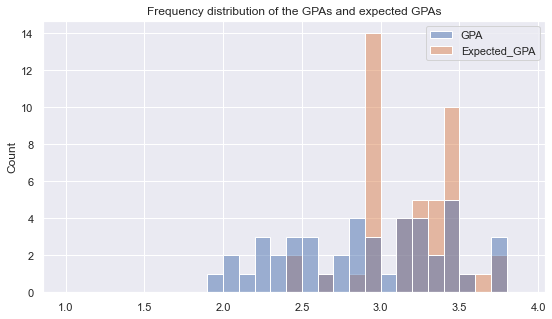

In [507]:
sns.set(rc={'figure.figsize':(9,5)})
sns.histplot(data=[df['GPA'],df['Expected_GPA']], bins=np.arange(1, 4, 0.1)).set(title='Frequency distribution of the GPAs and expected GPAs') # create histogram with GPAs and expected GPAs

People with a GPA of 2-2.5 expect a higher GPA. The majority expect a 3 or 3.5 GPA. The number of people with a GPA above 3.5 is higher than those who expect a GPA above 3.5, which shows that the expectations of those with a GPA above 3.5 may be lower than their GPA.

### Q2

Is there a relation between GPA and the Expected GPA? Plot a scatter plot between them and make comments (Do we see the relation?)


**Your Answer:**


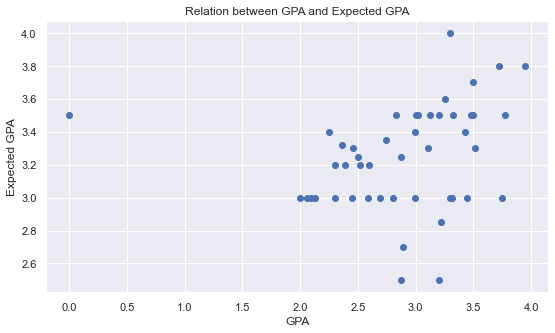

In [514]:
plt.figure(figsize=(9, 5))
plt.title("Relation between GPA and Expected GPA")
plt.xlabel("GPA")
plt.ylabel("Expected GPA")
plt.scatter(df["GPA"],df["Expected_GPA"]) # create scatter plot with GPAs and expected GPAs
plt.show()

Yes we see this relation. Most people with a GPA above 2 expect a GPA of 3 or higher. People with higher GPAs also seem to have higher expectations.

### Q3

If you separate high amount of your **time for sports**, does that mean you spend less **time on studying**? **Is there a relation between these features?** Also, is this relation affect the **expected letter grade?** How does the **time for hobbies** change in regard to all of these features? Find out with appropriate plotting method and make comments on the plot. **Include all of these information within a single plot.**


**Your Answer:**


<AxesSubplot:xlabel='Time_For_Study', ylabel='Time_For_Sports'>

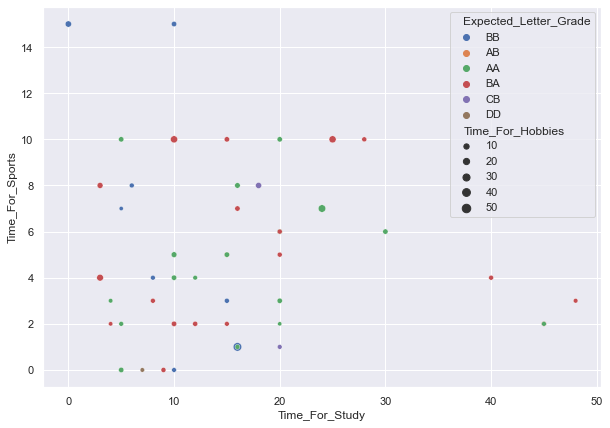

In [497]:
f, ax = plt.subplots(1,1, figsize=(10, 7))
sns.scatterplot(x="Time_For_Study", y="Time_For_Sports", hue="Expected_Letter_Grade", size="Time_For_Hobbies", data=df, ax=ax)

If you seperate high amount of your time for sports, then it means that you spend less time on studying.We can see that one of those who do sports for more than 14 hours does not study at all and the other works less. We cannot say there is a linear relation between time for sports and time for study. In some cases if they seperate high amount time to study then they spend less time on sports ,but there are some cases where they do both of them. Yes this relation affects the expected letter grade. They expect higher letter grades if they make time for both study and sports. In general, those who do less sports and those who work hard have less time for their hobbies, but we cannot relate to the letter grades they expect because there is not much diversity in the expectation of letter grades.

### Q4

Does the location affect the travel time? Make a boxplot for each neighborhood and see their average time for reaching to the school campus. Make comments on the output plot. Explain why there is no boxplot for some neighborhood.


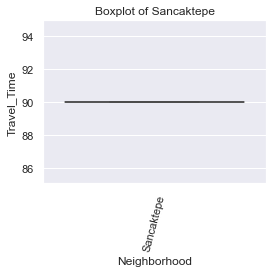

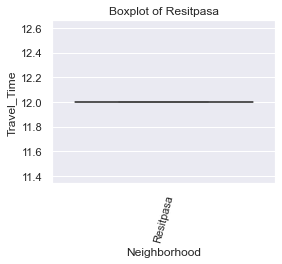

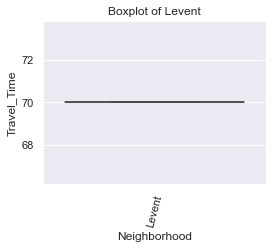

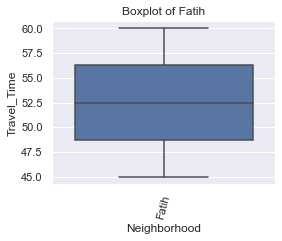

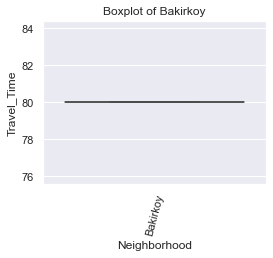

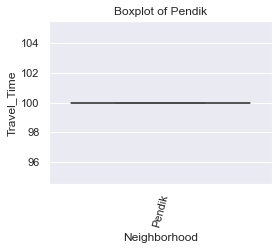

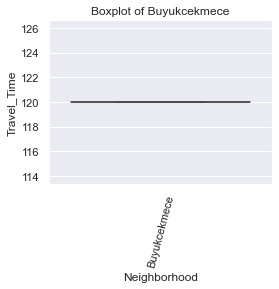

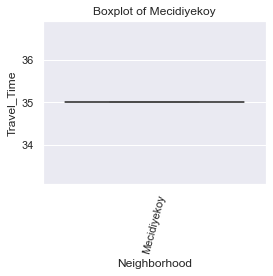

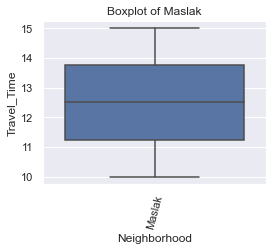

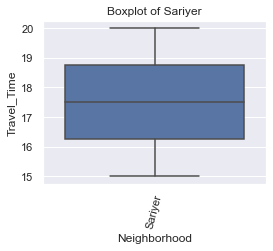

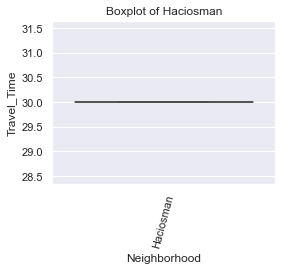

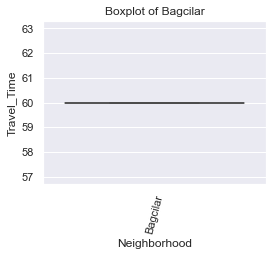

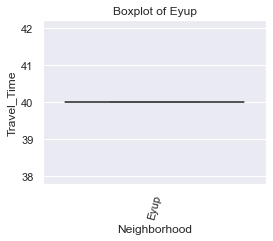

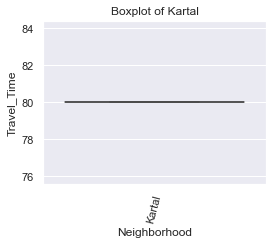

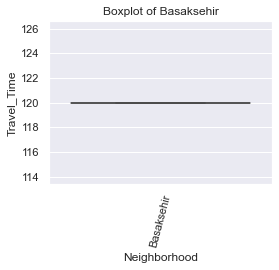

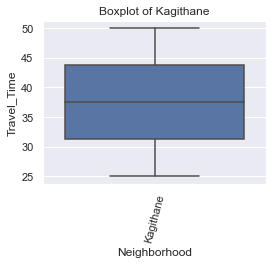

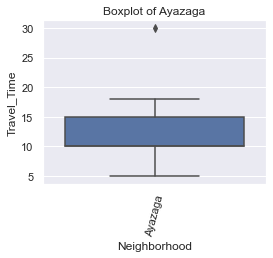

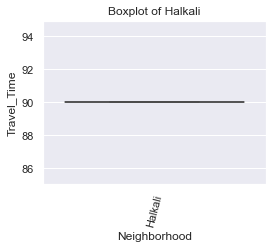

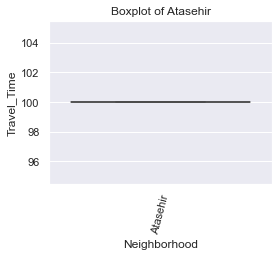

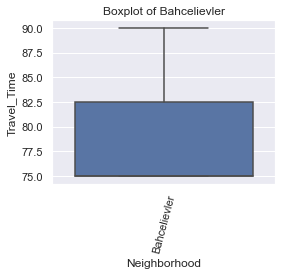

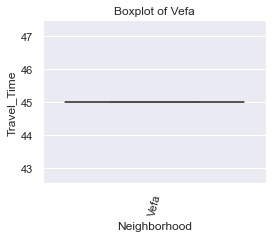

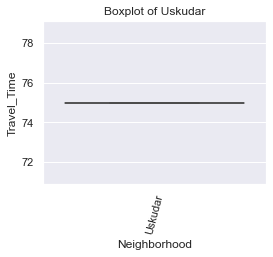

In [511]:
neighborhoods_list = ['Sancaktepe', 'Resitpasa', 'Levent', 'Fatih', 'Bakirkoy', 'Pendik', 'Buyukcekmece', 'Mecidiyekoy', 'Maslak', 'Sariyer',
                      'Haciosman', 'Bagcilar', 'Eyup', 'Kartal', 'Basaksehir', 'Kagithane', 'Ayazaga', 'Halkali', 'Atasehir', 'Bahcelievler', 'Vefa', 'Uskudar']

for i in neighborhoods_list: # Create a travel time boxplot for each neighborhood
    data = df[df.Neighborhood == i]
    fig = plt.figure(figsize=(4,3))
    plt.title(f"Boxplot of {i}")
    sns.boxplot(data=data, x="Neighborhood", y="Travel_Time") # set x axis as neighborhood and , y axis as travel time
    plt.xticks(rotation = 75)
    plt.show()

There is no boxplot for some neighborhood because we have only one data for those neighborhoods. We need more than one data for boxplot. Yes location affect the travel time. We understand that the travel times of people living in the same neighborhood are close to each other, from the narrow interquartile range of the data.

### Q5

Plot the geographical information in dataset ("Latitude","Longitude") on Istanbul by finding appropriate latitude and longitude for the basemap of Istanbul. You can set the size of each circle (data point) to **100**. Color may be same for each data point. Make comments on the plot.


**Your Answer:**


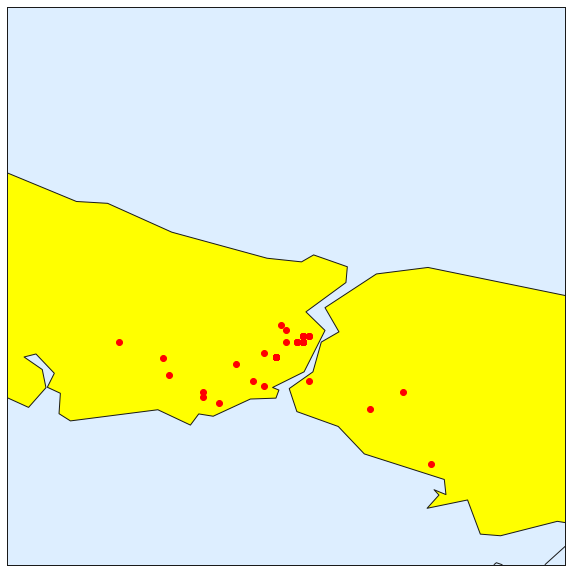

In [499]:
plt.rcParams["figure.figsize"] = 10, 15 # define size of figure
m = Basemap(llcrnrlat=40.7, urcrnrlat=41.7, llcrnrlon=28.5,
            urcrnrlon=29.50, resolution='i')  # define location information
m.fillcontinents(color="#FF0")  # define colors
m.drawmapboundary(fill_color="#DDEEFF")  # define colors
m.drawcoastlines()
lg = df['Longitude']
lt = df['Latitude']
x, y = m(lg, lt)
plt.scatter(x, y, color='red')  # definex axes and color

It is seen that the number of people living around the university is high, the majority of them live on the European side of Istanbul, and there are only a few people living on the Anatolian side.